# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [1]:
!pip install KModes

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [4]:
#help(KModes)

In [4]:
bank = pd.read_csv('bankmarketing.csv')

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age 78 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job 12 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital 4 ['married' 'single' 'divorced' 'unknown']
education 8 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default 3 ['no' 'unknown' 'yes']
housing 3 ['no' 'yes' 'unknown']
loan 3 ['no' 'yes' 'unknown']
contact 2 ['telephone' 'cellular']
month 10 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week 5 ['mon' 'tue' 'wed' 'thu' 'fri']
duration 1544 [ 261  149  226 ... 1246 1556 1868]
campaign 42 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 3

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
bank_cust = bank[
            ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome',
            'age','duration','euribor3m', 'y'] ]

In [26]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857,no


In [11]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [12]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [13]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
age            41188 non-null int64
duration       41188 non-null int64
euribor3m      41188 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 4.1+ MB


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catVar = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','y']

bank_cust[catVar] = bank_cust[catVar].apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,3,1,0,0,0,0,1,6,1,1,56,261,4.857,0
1,7,1,3,1,0,0,1,6,1,1,57,149,4.857,0
2,7,1,3,0,2,0,1,6,1,1,37,226,4.857,0
3,0,1,1,0,0,0,1,6,1,1,40,151,4.857,0
4,7,1,3,0,0,2,1,6,1,1,56,307,4.857,0


In [20]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246


In [28]:
#Standardize All Columns

#columns_to_normalize     = ['age','duration','euribor3m']

#bank_cust[columns_to_normalize] = bank_cust[columns_to_normalize].apply(lambda x: (x-x.mean())/  np.std(x))
bank_cust = bank_cust.apply(lambda x: (x-x.mean())/  np.std(x))


In [16]:
# Converting the dataset into matrix
bank_matrix = bank_cust.as_matrix()

In [29]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246,-0.356309
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246,-0.356309
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246,-0.356309
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246,-0.356309
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246,-0.356309


In [18]:
from kmodes.kprototypes import KPrototypes

In [31]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(bank_matrix, categorical=[12])

In [32]:
kproto.cluster_centroids_

[array([[-4.93059659e-02, -7.13421397e-02, -4.05108728e-02,
         -5.13599691e-01, -1.27497212e-01, -1.13487023e-02,
          1.31806678e+00,  3.96418399e-01, -2.15005924e-02,
          2.12301935e-01, -9.80049050e-02, -4.66394095e-02],
        [ 1.96048071e-01,  8.24504342e-01,  4.70934667e-01,
         -4.67019312e-01,  9.57578265e-02,  1.55334006e-02,
         -7.06987752e-01, -3.03825288e-01,  7.68221535e-02,
          3.77941487e-01, -7.72848424e-01,  5.99936445e-02],
        [-9.44936243e-02, -6.30161356e-01, -1.16678219e-01,
         -5.13599691e-01,  4.56953461e-02,  1.38649323e-03,
         -7.39610523e-01, -2.38808247e-01, -2.10526896e-02,
          3.71384276e-01,  5.98673880e-01,  2.60779397e-02],
        [ 3.67077250e-03,  5.92328336e-02,  2.39032175e-02,
         -2.23152440e-01,  6.33956620e-02,  4.24678024e-03,
         -6.17268315e-01,  3.07287879e-01, -4.80955626e-02,
         -2.56309793e+00, -1.25553130e-02, -3.95561054e-02],
        [-6.24433627e-02, -1.8793953

In [33]:
kproto.cost_

384980.93797823344

In [34]:
# Adding the predicted clusters to the main dataset
bank_cust['cluster_id'] = clusters

In [35]:
bankdf = pd.DataFrame(bank_cust['cluster_id'].value_counts())
bankdf

,cluster_id
0,10222
1,9502
2,9311
4,7920
3,4233


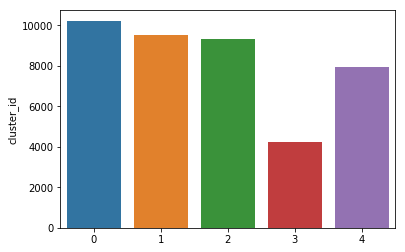

In [36]:
sns.barplot(x=bankdf.index, y=bankdf['cluster_id'],)

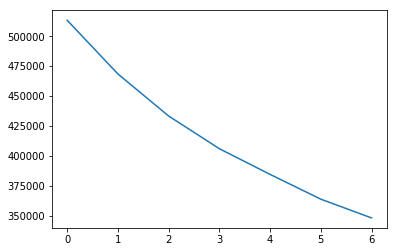

In [39]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(bank_matrix, categorical=[12])
    kproto.cost_
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [14]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246


In [15]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())

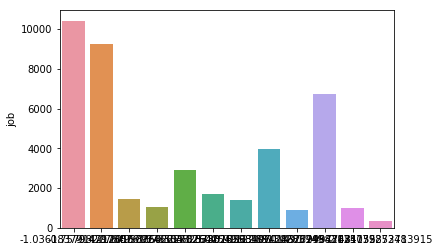

In [16]:
sns.barplot(x=job_df.index, y=job_df['job'])

In [17]:
job_df.head(5)

,job
-1.036184,10422
-0.757982,9254
1.467630,6743
0.911227,3969
0.076622,2924


## Using K-Mode with "Cao" initialization

In [19]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 994, cost: 264535.0
Run 1, iteration: 2/100, moves: 0, cost: 264535.0


In [20]:
# Predicted Clusters
fitClusters_cao

array([4, 4, 4, ..., 0, 2, 0], dtype=uint16)

In [21]:
pd.DataFrame(km_cao.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.036184,-0.283741,1.054464,-0.5136,0.942127,-0.452491,-0.75857,0.762558,-0.003301,0.192622,-0.674021,-0.587347,0.773575
1,-0.757982,1.358578,-0.349730,-0.5136,-1.087707,-0.452491,1.31827,-0.530547,-1.434368,0.192622,-0.386145,-0.568062,0.773575
2,1.467630,-0.283741,-0.349730,-0.5136,-1.087707,-0.452491,-0.75857,-1.392618,-0.718834,0.192622,-0.578062,-0.691483,0.774728
3,-0.757982,-0.283741,-0.817795,-0.5136,0.942127,-0.452491,1.31827,-0.099512,1.427767,0.192622,-0.865939,-0.676055,0.772999
4,0.911227,-0.283741,0.586399,-0.5136,-1.087707,-0.452491,1.31827,0.762558,0.712233,0.192622,-0.098268,-0.232513,0.712460


In [22]:
bank_cust.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'euribor3m'],
      dtype='object')

In [23]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [24]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-1.036184,-0.283741,1.054464,-0.5136,0.942127,-0.452491,-0.75857,0.762558,-0.003301,0.192622,-0.674021,-0.587347,0.773575
1,-0.757982,1.358578,-0.349730,-0.5136,-1.087707,-0.452491,1.31827,-0.530547,-1.434368,0.192622,-0.386145,-0.568062,0.773575
2,1.467630,-0.283741,-0.349730,-0.5136,-1.087707,-0.452491,-0.75857,-1.392618,-0.718834,0.192622,-0.578062,-0.691483,0.774728
3,-0.757982,-0.283741,-0.817795,-0.5136,0.942127,-0.452491,1.31827,-0.099512,1.427767,0.192622,-0.865939,-0.676055,0.772999
4,0.911227,-0.283741,0.586399,-0.5136,-1.087707,-0.452491,1.31827,0.762558,0.712233,0.192622,-0.098268,-0.232513,0.712460


## Using K-Mode with "Huang" initialization

In [25]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12295, cost: 263184.0
Run 1, iteration: 2/100, moves: 1301, cost: 263184.0


In [26]:
# Predicted clusters
fitClusters_huang

array([0, 0, 3, ..., 2, 2, 2], dtype=uint16)

In [27]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [28]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.757982,-0.283741,-0.349730,-0.5136,-1.087707,-0.452491,1.31827,-0.099512,-0.718834,0.192622,-0.386145,-0.641343,0.772422
1,-1.036184,1.358578,-0.349730,-0.5136,0.942127,-0.452491,-0.75857,-0.530547,-0.003301,0.192622,-1.057857,-0.649057,0.772999
2,-1.036184,-0.283741,1.054464,-0.5136,0.942127,-0.452491,-0.75857,0.762558,-1.434368,0.192622,-0.482104,-0.475497,0.773575
3,-0.757982,-0.283741,-0.817795,-0.5136,0.942127,-0.452491,1.31827,0.762558,1.427767,0.192622,0.477486,-0.251797,0.712460
4,1.467630,1.358578,0.586399,-0.5136,0.942127,-0.452491,-0.75857,-1.823653,1.427767,-2.563098,-0.865939,-0.706911,-1.277824


## Choosing K by comparing Cost against each K

In [29]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 310728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7276, cost: 284302.0
Run 1, iteration: 2/100, moves: 1057, cost: 284302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6717, cost: 273395.0
Run 1, iteration: 2/100, moves: 1627, cost: 273395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4807, cost: 267820.0
Run 1, iteration: 2/100, moves: 476, cost: 267820.0


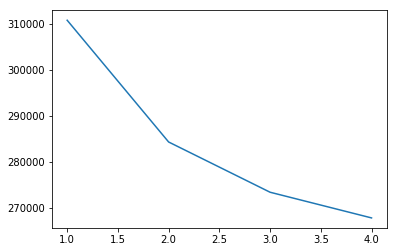

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [31]:
## Choosing K=2

In [32]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 994, cost: 264535.0
Run 1, iteration: 2/100, moves: 0, cost: 264535.0


In [33]:
fitClusters_cao

array([4, 4, 4, ..., 0, 2, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [ ]:
bank_cust.info()

In [ ]:

clustersDf.info()

In [34]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [35]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,cluster_predicted
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246,4
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246,4
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246,4
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246,4
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246,4


In [36]:
combinedDf.cluster_predicted.unique()

array([4, 1, 3, 0, 2], dtype=uint64)

In [42]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [43]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

# Data for Cluster2
cluster2 = combinedDf[combinedDf.cluster_predicted==2]

# Data for Cluster3
cluster3 = combinedDf[combinedDf.cluster_predicted==3]

# Data for Cluster4
cluster4 = combinedDf[combinedDf.cluster_predicted==4]

In [46]:
cluster0.shape

(18809, 14)

In [47]:
cluster1.shape

(5640, 14)

In [48]:
cluster2.shape

(6632, 14)

In [49]:
cluster3.shape

(5530, 14)

In [50]:
cluster4.shape

(4577, 14)

In [53]:
# Checking the count per category for JOB
job0_df = pd.DataFrame(cluster0['job'].value_counts())
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job2_df = pd.DataFrame(cluster2['job'].value_counts())
job3_df = pd.DataFrame(cluster3['job'].value_counts())
job4_df = pd.DataFrame(cluster4['job'].value_counts())


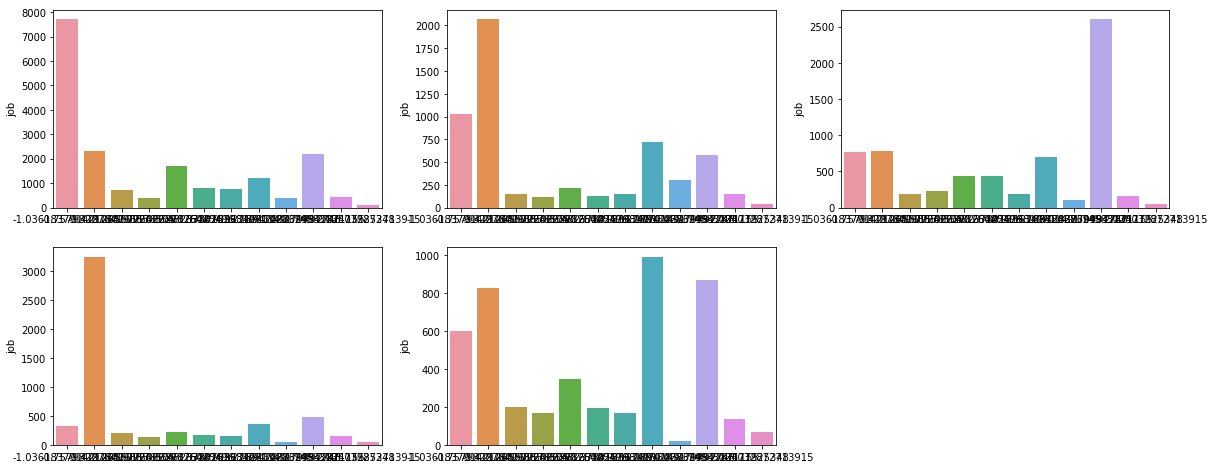

In [64]:
fig, ax =plt.subplots(figsize=(20,8))
plt.subplot(2,3,1)
sns.barplot(x=job0_df.index, y=job0_df['job'])
plt.subplot(2,3,2)
sns.barplot(x=job1_df.index, y=job1_df['job'])
plt.subplot(2,3,3)
sns.barplot(x=job2_df.index, y=job2_df['job'])
plt.subplot(2,3,4)
sns.barplot(x=job3_df.index, y=job3_df['job'])
plt.subplot(2,3,5)
sns.barplot(x=job4_df.index, y=job4_df['job'])

fig.show()

In [ ]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()

In [ ]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

In [ ]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())